In [1]:
import numpy as np 
from random import randint 
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [5]:
scaler  = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1 ))

In [6]:
import numpy as np 
from random import randint 
from sklearn.utils import shuffle 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


2026-02-10 12:08:31.613162: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(f"Number of GPU available: {len(physical_devices)}")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU detected")


Number of GPU available: 0
No GPU detected


In [8]:
model = Sequential([
    Dense(16,input_shape = (1,),activation='relu'),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

/home/nirzar-diwan/miniconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="adam",loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [11]:
model.fit(
    scaled_train_samples,
    train_labels,
    validation_split= 0.2,
    batch_size=10,
    epochs = 30,
    shuffle=True,
    verbose = 2)

Epoch 1/30
168/168 - 1s - 8ms/step - accuracy: 0.6851 - loss: 0.6122 - val_accuracy: 0.7714 - val_loss: 0.5269
Epoch 2/30
168/168 - 0s - 2ms/step - accuracy: 0.8667 - loss: 0.4299 - val_accuracy: 0.8476 - val_loss: 0.3772
Epoch 3/30
168/168 - 0s - 2ms/step - accuracy: 0.9256 - loss: 0.3174 - val_accuracy: 0.9238 - val_loss: 0.3128
Epoch 4/30
168/168 - 0s - 2ms/step - accuracy: 0.9310 - loss: 0.2827 - val_accuracy: 0.9119 - val_loss: 0.3018
Epoch 5/30
168/168 - 0s - 2ms/step - accuracy: 0.9369 - loss: 0.2696 - val_accuracy: 0.9238 - val_loss: 0.2917
Epoch 6/30
168/168 - 0s - 2ms/step - accuracy: 0.9369 - loss: 0.2617 - val_accuracy: 0.9381 - val_loss: 0.2825
Epoch 7/30
168/168 - 0s - 2ms/step - accuracy: 0.9381 - loss: 0.2590 - val_accuracy: 0.9452 - val_loss: 0.2785
Epoch 8/30
168/168 - 0s - 2ms/step - accuracy: 0.9446 - loss: 0.2539 - val_accuracy: 0.9286 - val_loss: 0.2784
Epoch 9/30
168/168 - 0s - 2ms/step - accuracy: 0.9429 - loss: 0.2513 - val_accuracy: 0.9381 - val_loss: 0.2757
E

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools 
import os 
import shutil
import random 


In [13]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [15]:
def prepare_image(file):
    img_path = 'data/'
    img = image.load_img(img_path + file , target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis = 0)

    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [37]:
# test_img = "man.jpg" ### try different images from the data folder 
# test_img = "mobile.jpg" 
test_img = 'chair.jpeg'

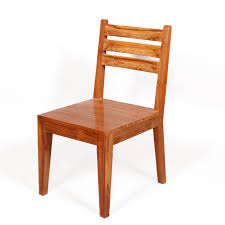

In [38]:
from IPython.display import Image 

Image(filename="data/" + test_img,width=300,height=200)

In [39]:

preprocessed_image = prepare_image(test_img)
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[[('n03376595', 'folding_chair', np.float32(0.46966854)),
  ('n03903868', 'pedestal', np.float32(0.20742331)),
  ('n03201208', 'dining_table', np.float32(0.17081828)),
  ('n03179701', 'desk', np.float32(0.07535077)),
  ('n04099969', 'rocking_chair', np.float32(0.017424028))]]